# Unit Conversion Trick
We may also want to do math on pandas data.  So to do this I thought we could convert our units.  

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy import stats
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
df_well_data=pd.read_csv('well_data.csv')

I did not talk about units except for Arsenic.  But we have the following elements and their units.  

    'Si':ppb,
    'P':ppm,
    'S':ppb,
    'Ca':ppb,
    'Fe':ppm,
    'Ba':ppb,
    'Na':ppm,
    'Mg':ppb,
    'K':ppb,
    'Mn':ppm,
    'As':ppb,
    'Sr':ppb,
    'F':ppm,
    'Cl':ppm,
    'SO4':ppm,
    'Br':ppm

Remember back to chemistry........ 

ppm=parts per million = milligrams per liter = mg/l

ppb=parts per billions = micrograms per liter = ug/l

we can convert between these two.  1000 ppb = 1 ppm  or 
to convert 

## $1 \frac{mg}{l} * \frac{1000 u}{m}= 1000 \frac{ug}{l}$



 

So lets convert As to ppm.  It is now ppb.  We could just print it first

In [3]:
print(df_well_data.As/1000)

0           NaN
1           NaN
2           NaN
3      0.078977
4           NaN
5           NaN
6      0.028071
7           NaN
8      0.096886
9      0.080627
10          NaN
11     0.077007
12     0.039250
13     0.131249
14     0.000177
15          NaN
16          NaN
17     0.147639
18          NaN
19     0.052427
20          NaN
21          NaN
22          NaN
23          NaN
24     0.005365
25          NaN
26          NaN
27          NaN
28     0.053098
29          NaN
         ...   
729    0.165760
730         NaN
731    0.000180
732    0.093650
733    0.101430
734         NaN
735         NaN
736    0.087900
737         NaN
738    0.001170
739    0.085260
740    0.055750
741    0.026960
742         NaN
743         NaN
744         NaN
745         NaN
746         NaN
747         NaN
748    0.000120
749    0.031690
750    0.009150
751    0.026980
752    0.021740
753    0.117820
754    0.000130
755    0.017390
756    0.112370
757    0.248930
758         NaN
Name: As, Length: 759, d

that didn't change it.  We could set a new column.

In [4]:
df_well_data['As-ppm']=df_well_data.As/1000

In [5]:
print(df_well_data.describe())

             Well_ID         Lat         Lon       Depth            Si  \
count     759.000000  759.000000  759.000000  759.000000    407.000000   
mean     6417.088274   23.789249   90.641199   65.554677  40101.151444   
std      6695.778189    0.578493    0.578800   42.186161  10117.680290   
min         2.000000   22.780000   89.610000    0.000000  12605.576700   
25%      4116.000000   23.285000   90.155000   45.000000  33200.310900   
50%      5928.000000   23.790000   90.650000   50.000000  40021.490000   
75%      8134.500000   24.300000   91.130000   70.000000  45369.825000   
max    141499.000000   24.770000   91.650000  523.000000  70304.057950   

                P             S             Ca          Fe          Ba  \
count  407.000000    407.000000     407.000000  407.000000  407.000000   
mean     0.809323   3407.292389   41129.291921    5.556200   89.078507   
std      0.902860   5364.247733   20161.130827    5.153779   54.172650   
min      0.008210    -41.390000    35

or we could have just looked at column titles

In [6]:
df_well_data.columns

Index(['Well_ID', 'Lat', 'Lon', 'Depth', 'Drink', 'Si', 'P', 'S', 'Ca', 'Fe',
       'Ba', 'Na', 'Mg', 'K', 'Mn', 'As', 'Sr', 'F', 'Cl', 'SO4', 'Br',
       'As-ppm'],
      dtype='object')

We could delete our new column now

In [7]:
del df_well_data['As-ppm']

We could also just convert the As column itself.  

In [8]:
df_well_data.As/=1000

In [9]:
print (df_well_data.As.describe())

count    407.000000
mean       0.089689
std        0.101531
min        0.000000
25%        0.014027
50%        0.054400
75%        0.129433
max        0.700890
Name: As, dtype: float64


It worked wonderfully.  

We sometimes want molar concentrations.  I can't cross out the math on the screen but we can use the elemental weights to convert 

from parts per billion to micromolar

from parts per million to millimolar. 

for example

## $\frac{mg}{l}*\frac{1 Mole}{grams in one mole}=\frac{mM}{l}=mM$

The average arsenic is 0.0897 mg/l

## $0.0897\frac{mg}{l}*\frac{M}{74.921}=0.001197mM$

Now lets try on our data.  


In [10]:
df_well_data.As/=74.921
print(df_well_data.As.describe())

count    407.000000
mean       0.001197
std        0.001355
min        0.000000
25%        0.000187
50%        0.000726
75%        0.001728
max        0.009355
Name: As, dtype: float64


It worked beautifully.  But that number is too small.  So I will convert to micromolar by multibplying by 1000. 

In [11]:
df_well_data.As*=1000
print (df_well_data.As.describe())

count    407.000000
mean       1.197109
std        1.355169
min        0.000000
25%        0.187222
50%        0.726098
75%        1.727597
max        9.355054
Name: As, dtype: float64


### A big be careful!!!!  If you keep rerunning a cell it will do the math over and over again!!!!

But we have up to 16 elements we may want to convert.  Could we convert them all ot once.  

I used to do this using a dict or dictionary.  And it worked well. I learned this at codeacademy.  But I was thinking some this year.  I thought we could do it better using pandas.  How do we do it?  What we are really doing is tracking our "metadata".
-  Make an excel file we can continuously update 
-  In it list the Element, Its Formula Weight, and what I call Unit for fancy printing.
-  I called it UnitConversion.xlsx https://github.com/bmaillou/BigDataPython/blob/master/UnitConversion.xlsx
-  we can read it in with pd.read_excel and we can set the index to the Element
-  Setting the index to the Element makes it easy to search!
-  For the units I used a lot of different formatting to make it fancy so you can see how it works.  It uses Latex


In [12]:
#I am just re-reading in the data to start fresh.
df_well_data=pd.read_csv('well_data.csv')

In [13]:
df_units=pd.read_excel('UnitConversion.xlsx',index_col='Element')

In [14]:
df_units

,FW,Unit
Element,,
Si,28.1000,Si (ppb)
P,30.9700,Phosphourous (ppm)
S,32.0600,Sulfur $\left(\frac{\mu g}{L} \right)$
Ca,40.0780,pbb
Fe,55.8450,Fe (mgL$^{-1}$)
Ba,137.3260,ppb
Na,22.9890,Sodium is boring
Mg,24.3050,ppm
K,29.0983,I hate units!


## This is fun.
If we want to use the FW to switch to molar units.  We can now loop through our data columns and use the df_units.FW data to convert

But there are some columns that are not in units.  So we can check and only convert ones in df_units using the in command

look at the data once with describe.  Run the for loop and look again!

In [15]:
df_well_data.describe()

,Well_ID,Lat,Lon,Depth,Si,P,S,Ca,Fe,Ba,Na,Mg,K,Mn,As,Sr,F,Cl,SO4,Br
count,759.000000,759.000000,759.000000,759.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,343.000000,407.000000,407.000000,407.000000,413.000000,411.000000,397.000000,405.000000
mean,6417.088274,23.789249,90.641199,65.554677,40101.151444,0.809323,3407.292389,41129.291921,5.556200,89.078507,29.441511,20.487685,5068.337278,1.309343,89.688641,186.770328,0.216924,42.371061,9.300930,0.056895
std,6695.778189,0.578493,0.578800,42.186161,10117.680290,0.902860,5364.247733,20161.130827,5.153779,54.172650,17.888604,11.359487,5566.741424,0.978969,101.530582,90.501136,0.194702,34.464444,14.287154,0.087262
min,2.000000,22.780000,89.610000,0.000000,12605.576700,0.008210,-41.390000,3577.160000,-0.003680,5.630000,4.428421,2.490000,18.855854,0.000000,0.000000,34.470000,-0.010200,0.226100,0.120000,0.005800
25%,4116.000000,23.285000,90.155000,45.000000,33200.310900,0.151957,149.635000,26996.273955,1.706806,53.423976,15.171753,14.020000,2804.793027,0.545000,14.026849,119.685000,0.113000,18.931200,0.407100,0.019300
50%,5928.000000,23.790000,90.650000,50.000000,40021.490000,0.507850,1220.877945,40166.830000,3.931310,79.674488,23.775190,18.250000,3563.100000,1.183136,54.400000,174.617542,0.166700,31.298100,3.344400,0.032700
75%,8134.500000,24.300000,91.130000,70.000000,45369.825000,1.189271,4341.695000,52976.458285,8.531585,113.711543,41.495813,24.780000,4979.045000,1.850000,129.433314,233.535000,0.239700,52.962050,11.973300,0.053800
max,141499.000000,24.770000,91.650000,523.000000,70304.057950,5.477616,45035.460000,116040.620000,30.192230,293.440000,105.318060,104.545670,44273.150000,6.271782,700.890000,681.287906,1.595800,217.525000,125.317000,0.994800


In [16]:
for i in df_well_data:
    if i in df_units.index:
        df_well_data[i]=df_well_data[i]/df_units.FW[i]

In [17]:
df_well_data.describe()

,Well_ID,Lat,Lon,Depth,Si,P,S,Ca,Fe,Ba,Na,Mg,K,Mn,As,Sr,F,Cl,SO4,Br
count,759.000000,759.000000,759.000000,759.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,343.000000,407.000000,407.000000,407.000000,413.000000,411.000000,397.000000,405.000000
mean,6417.088274,23.789249,90.641199,65.554677,1427.087240,0.026132,106.278615,1026.231147,0.099493,0.648665,1.280678,0.842941,174.179841,0.023833,1.197109,2.131595,0.011418,1.195234,0.096865,0.000712
std,6695.778189,0.578493,0.578800,42.186161,360.059797,0.029153,167.319018,503.047328,0.092287,0.394482,0.778138,0.467372,191.308132,0.017820,1.355169,1.032882,0.010249,0.972199,0.148794,0.001092
min,2.000000,22.780000,89.610000,0.000000,448.597036,0.000265,-1.291017,89.254953,-0.000066,0.040997,0.192632,0.102448,0.648005,0.000000,0.000000,0.393403,-0.000537,0.006378,0.001250,0.000073
25%,4116.000000,23.285000,90.155000,45.000000,1181.505726,0.004907,4.667342,673.593342,0.030563,0.389030,0.659957,0.576836,96.390271,0.009920,0.187222,1.365955,0.005948,0.534025,0.004240,0.000242
50%,5928.000000,23.790000,90.650000,50.000000,1424.252313,0.016398,38.081034,1002.216428,0.070397,0.580185,1.034199,0.750874,122.450452,0.021536,0.726098,1.992896,0.008775,0.882880,0.034830,0.000409
75%,8134.500000,24.300000,91.130000,70.000000,1614.584520,0.038401,135.424049,1321.833881,0.152773,0.828041,1.805029,1.019543,171.111199,0.033674,1.727597,2.665316,0.012617,1.493993,0.124696,0.000673
max,141499.000000,24.770000,91.650000,523.000000,2501.923770,0.176868,1404.724267,2895.369529,0.540643,2.136813,4.581237,4.301406,1521.502974,0.114161,9.355054,7.775484,0.083998,6.136107,1.305114,0.012450


### To make a fancier graph.  
Subsitute the Unit everytime you use i.  

Try it once in a for loop.  

In [18]:
for i in df_well_data:
    if i in df_units.index:
        print (i,'\t',df_units.Unit[i])

Si 	 Si (ppb)
P 	 Phosphourous (ppm)
S 	 Sulfur $\left(\frac{\mu g}{L} \right)$
Ca 	 pbb
Fe 	 Fe (mgL$^{-1}$)
Ba 	 ppb
Na 	 Sodium is boring
Mg 	 ppm
K 	 I hate units!
Mn 	 ppm
As 	 Arsenic (ppb)
Sr 	 ppb
F 	 ppm
Cl 	 something else?
SO4 	 ppm
Br 	 ppm


So lets go back and grab our graph and try it! I will use the graphs with arsenic versus depth.  I will also reread the files in case I corrupted anything

Text(0,0.5,'Depth ft')

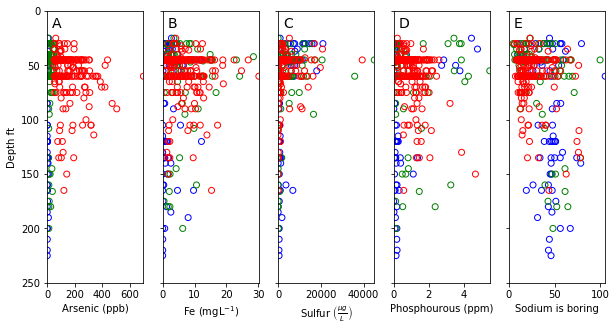

In [21]:
df_units=pd.read_excel('UnitConversion.xlsx',index_col='Element')
df_well_data=pd.read_csv('well_data.csv')
elems=['As','Fe','S','P','Na']
fig, ax = plt.subplots(1, len(elems), sharey=True)
fig.set_size_inches(10,5)

for i,elem in enumerate(elems):
    ax[i].scatter(df_well_data[elem][df_well_data.As<10],df_well_data.Depth[df_well_data.As<10]\
                  ,edgecolors='b',label='<10',facecolor='none')
    ax[i].scatter(df_well_data[elem][np.logical_and(df_well_data.As>=10,df_well_data.As<=50)]\
                  ,df_well_data.Depth[np.logical_and(df_well_data.As>=10,df_well_data.As<=50)]\
                  ,edgecolors='g',label='10-50',facecolor='none')
    ax[i].scatter(df_well_data[elem][df_well_data.As>50],df_well_data.Depth[df_well_data.As>50]\
                  ,edgecolors='r',label='>50',facecolor='none')

    ax[i].set_xlabel(df_units.Unit[elem])

    ax[i].set_xlim([0,df_well_data[elem].max()])
    ax[i].xaxis.major.locator.set_params(nbins=4) 
    
    ax[i].text(0.05,0.98,chr(i + ord('A')),transform=ax[i].transAxes,fontsize=14,verticalalignment='top')

ax[0].set_ylim([250,0])
ax[0].set_ylabel('Depth ft')

### now for your homework where you want to change names you can do the same thing!  Make an excel sheet with the long and short names and substitute!  A big warning.  Print doesn't always print the whole name. This works. 
print(df_r2.iloc[5,0])